In [338]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
from jira import JIRA
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [25]:
jira = JIRA('https://jira.sonarsource.com/')

In [94]:
issue_fields = ['issuetype',
 'customfield_12130',
 'customfield_11041',
 'customfield_12132',
 'customfield_12131',
 'project',
 'customfield_12134',
 'customfield_12530',
 'fixVersions',
 'customfield_12133',
 'customfield_12136',
 'customfield_12532',
 'resolution',
 'customfield_10431',
 'customfield_12135',
 'customfield_12531',
 'customfield_12138',
 'customfield_10432',
 'customfield_12534',
 'customfield_12137',
 'customfield_10433',
 'customfield_12533',
 'customfield_11832',
 'customfield_11831',
 'customfield_11833',
 'resolutiondate',
 'workratio',
 'lastViewed',
 'watches',
 'created',
 'customfield_11032',
 'customfield_11033',
 'priority',
 'customfield_11630',
 'customfield_11233',
 'customfield_11036',
 'customfield_11830',
 'labels',
 'customfield_11631',
 'customfield_11038',
 'customfield_10930',
 'customfield_11347',
 'customfield_10931',
 'customfield_10932',
 'versions',
 'issuelinks',
 'assignee',
 'updated',
 'status',
 'components',
 'customfield_12031',
 'customfield_11140',
 'customfield_12030',
 'customfield_12033',
 'customfield_11141',
 'description',
 'customfield_12032',
 'customfield_12034',
 'customfield_12430',
 'customfield_11344',
 'customfield_11343',
 'customfield_10530',
 'customfield_11345',
 'customfield_10730',
 'customfield_11337',
 'customfield_11930',
 'customfield_11139',
 'customfield_11338',
 'summary',
 'creator',
 'subtasks',
 'customfield_11130',
 'customfield_11131',
 'reporter',
 'customfield_11132',
 'customfield_11133',
 'customfield_10243',
 'customfield_11335',
 'customfield_11334',
 'customfield_11730',
 'customfield_10434',
 'customfield_12536',
 'customfield_12535',
 'customfield_12139',
 'environment',
 'customfield_12538',
 'customfield_10437',
 'customfield_12537',
 'customfield_10438',
 'duedate',
 'votes',
 #'__module__',
 #'__dict__',
 #'__weakref__',
 #'__doc__'
       ]

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

#download all issues
size = 100
initial = 0
issue_tuples = []
all_issues = []
while True:
    start= initial*size
    issues = jira.search_issues('project=SONAR',  start,size)
    all_issues = all_issues + issues
    if len(issues) == 0:
        break
    initial += 1

#create tuples for dataframe creation
for issue in all_issues:
    values = []
    values.append(issue.key)
    values.append(issue.id)
    for field in issue_fields:
        values.append(getattr(issue.fields, field))
    issue_tuples.append(values)

In [233]:
issues_df = pd.DataFrame(issue_tuples, columns=(["issue_key", "issue_id"] + issue_fields))
issues_df

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,...,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],None,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],None,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
3,SONAR-13909,97858,New Feature,P3-Medium,0|i0dk8v:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
4,SONAR-13907,97855,Improvement,P3-Medium,0|i0dk87:,No root cause identified,None,SONAR,Not captured yet,None,...,New,None,None,None,None,,None,[],2020-10-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11502,SONAR-5,30985,New Feature,None,0|i0387z:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11503,SONAR-4,29449,Bug,None,0|i02zzj:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11504,SONAR-3,32314,New Feature,None,0|i03fqn:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0
11505,SONAR-2,29663,New Feature,None,0|i0312n:,None,None,SONAR,None,None,...,None,None,None,None,None,None,None,[],None,0


In [121]:
def extract_features(df, field, fields_to_extract):
    for fte in fields_to_extract:
        df[f"{field}_{fte}"] = issues_df[field].apply(lambda x: getattr(x,fte) if x else None)
    return df

#### Extract features

In [234]:
extract_features(issues_df, "issuetype", ["id", "name"])
extract_features(issues_df, "priority", ["id", "name"])
extract_features(issues_df, "assignee", ["key", "name"])
extract_features(issues_df, "reporter", ["key", "name"])
extract_features(issues_df, "creator", ["key", "name"])
extract_features(issues_df, "status", ["id", "name"])
extract_features(issues_df, "resolution", ["id", "name"])
extract_features(issues_df, "votes", ["votes"])

#### Type of columns

In [341]:
issues_df["issue_id"] = pd.to_numeric(issues_df.issue_id)
issues_df['created'] = pd.to_datetime(issues_df['created'],errors='coerce', utc=True)
issues_df['resolutiondate'] = pd.to_datetime(issues_df['resolutiondate'],errors='coerce', utc=True)
issues_df['updated'] = pd.to_datetime(issues_df['updated'],errors='coerce', utc=True)
issues_df['duedate'] = pd.to_datetime(issues_df['duedate'],errors='coerce', utc=True)

#### Rename columns

In [347]:
issues_df = issues_df.rename(columns={"customfield_11630": "edition"})

In [348]:
issues_df.to_csv("csv/issues.csv")
issues_df = pd.read_csv("csv/issues.csv", index_col=0)
issues_df

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaN,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaN,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Extract versions

In [202]:
def extract_versions(all_issues, version_field, prefix):
    values = []
    for issue in all_issues:
        for version in getattr(issue.fields, version_field):
            values.append((issue.id,version.name,version.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_name", f"{prefix}_id"])

In [203]:
issues_fixversions = extract_versions(all_issues, "fixVersions", "fixVersion")
issues_fixversions.to_csv("csv/issues_fixversions.csv")
issues_fixversions = pd.read_csv("csv/issues_fixversions.csv", index_col=0)
issues_fixversions

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342
...,...,...,...
8514,30985,1.1,11537
8515,29449,1.1,11537
8516,32314,1.1,11537
8517,29663,1.1,11537


In [204]:
issues_versions = extract_versions(all_issues, "versions", "version")
issues_versions.to_csv("csv/issues_versions.csv")
issues_versions = pd.read_csv("csv/issues_versions.csv", index_col=0)
issues_versions

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404
...,...,...,...
3330,29492,1.0.2,11536
3331,29496,1.0.2,11536
3332,29480,1.1,11537
3333,29473,1.5,11545


### Extract labels

In [205]:
def extract_labels(all_issues, field, column):
    values = []
    for issue in all_issues:
        for value in getattr(issue.fields, field):
            values.append((issue.id, value))
    return pd.DataFrame(values, columns=["issue_id", column])

In [206]:
issues_labels = extract_labels(all_issues, "labels", "label")
issues_labels.to_csv("issues_labels.csv")
issues_labels = pd.read_csv("issues_labels.csv", index_col=0)
issues_labels

,issue_id,label
0,97868,trello:5f71b7467b498d57987bfe0a
1,97813,GitHubIntegration
2,97813,usability-testing-findings
3,97673,JenkinsIntegration
4,97673,usability-testing-findings
...,...,...
2978,31244,tendency
2979,27938,treemap
2980,27963,drilldown
2981,28399,drilldown


### Extract subtasks

In [207]:
def extract_subtasks(all_issues, field, prefix):
    values = []
    for issue in all_issues:
        for subtask in getattr(issue.fields, field):
            values.append((issue.id,subtask.key,subtask.id))
    return pd.DataFrame(values, columns=["issue_id", f"{prefix}_key", f"{prefix}_id"])

In [208]:
issues_substaks = extract_subtasks(all_issues, "subtasks", "subtask")
issues_substaks.to_csv("csv/issues_subtasks.csv")
issues_substaks = pd.read_csv("csv/issues_subtasks.csv", index_col=0)
issues_substaks

,issue_id,subtask_key,subtask_id
0,97393,SONAR-13858,97372
1,97393,SONAR-13868,97394
2,97387,SONAR-13863,97388
3,97387,SONAR-13864,97389
4,97387,SONAR-13865,97390
...,...,...,...
846,30992,SONAR-2589,30847
847,30992,SONAR-2590,28458
848,30992,SONAR-2591,30079
849,30992,SONAR-2592,31904


## Field analysis

### Workratio

<AxesSubplot:xlabel='workratio'>

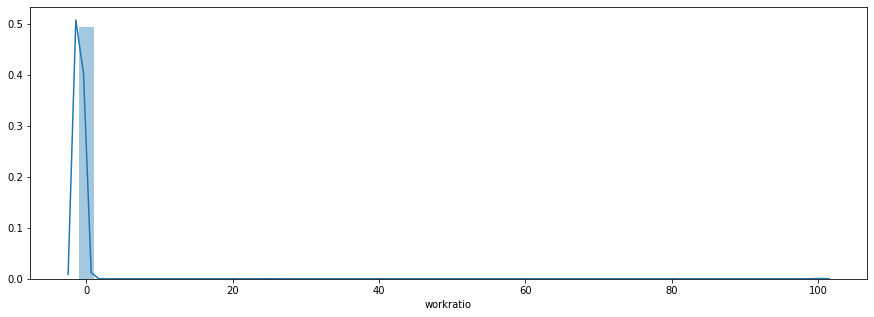

In [242]:
sns.distplot(issues_df.workratio)

<AxesSubplot:xlabel='workratio', ylabel='issue_id'>

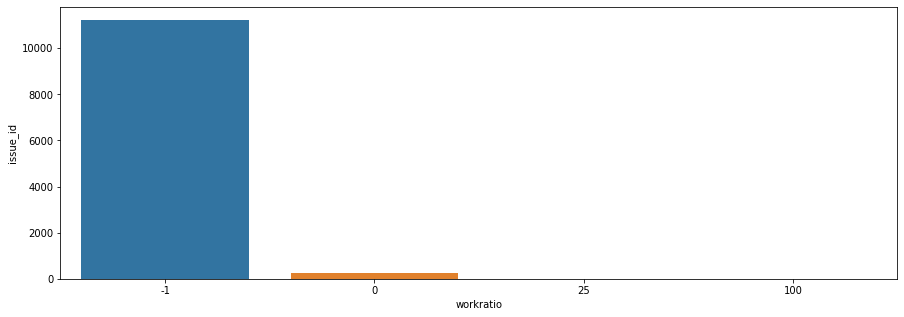

In [251]:
sns.barplot(x="workratio", y="issue_id", data=issues_df.groupby("workratio").count().reset_index())

### IssueType

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

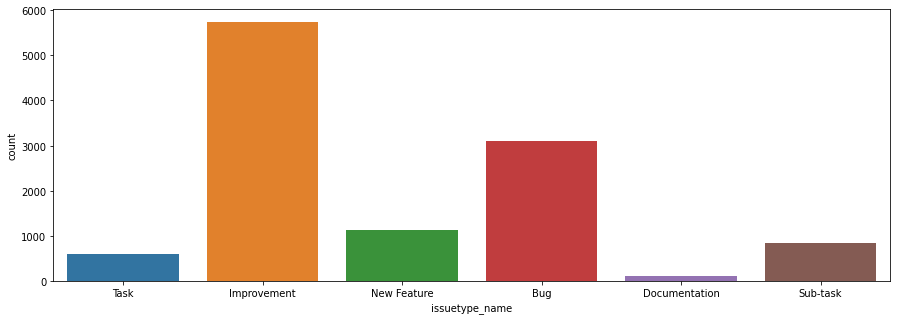

In [210]:
sns.countplot(x="issuetype_name", data=issues_df[["issue_id", "issuetype_name"]])

### Resolution

In [211]:
issues_df.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub',
       'Incomplete', 'Not A Bug', 'UNRESOLVED'], dtype=object)

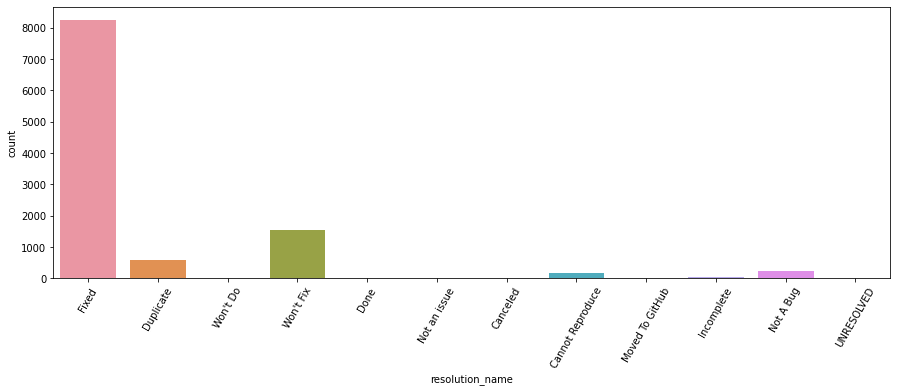

In [212]:
ax = sns.countplot(x="resolution_name", data=issues_df[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

### Watches

In [213]:
pp.pprint(issues_df.watches[0])

'<JIRA Watchers at 5060633888>'


### Priority

In [214]:
issues_df.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

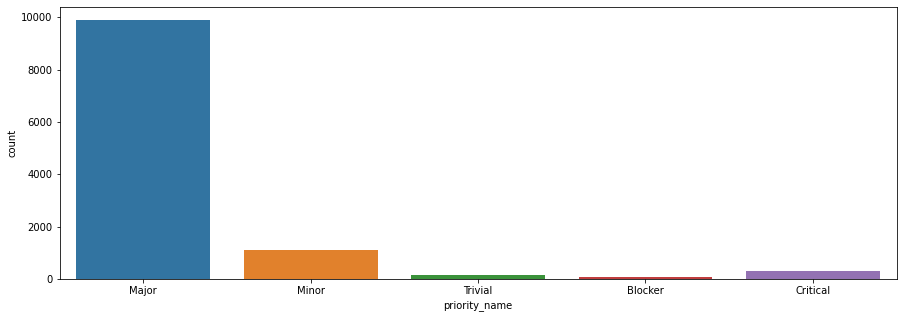

In [215]:
ax = sns.countplot(x="priority_name", data=issues_df[["issue_id", "priority_name"]])

### Labels

In [216]:
len(issues_labels.label.unique())

205

<AxesSubplot:xlabel='label'>

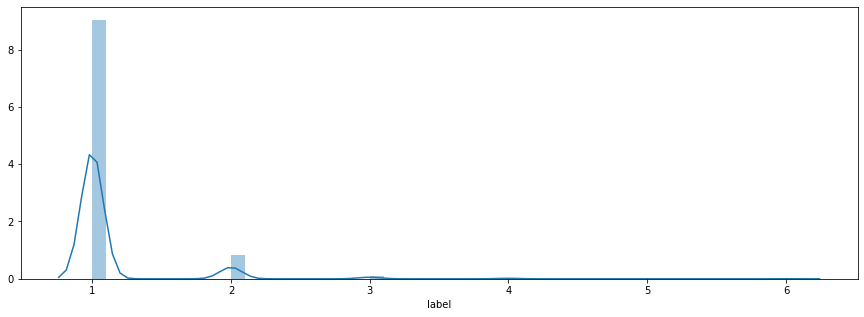

In [217]:
sns.distplot(issues_labels.groupby("issue_id").count().label)

### Versions

In [218]:
len(issues_versions.version_name.unique())

143

In [219]:
top_versions = issues_versions.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)
top_versions.head(10)

,version_name,issue_id
15,1.5,131
30,2.11,80
87,5.2,79
35,2.2,77
43,2.8,69
7,1.12,67
111,6.7,66
22,1.9.2,61
20,1.9,59
82,5.0,56


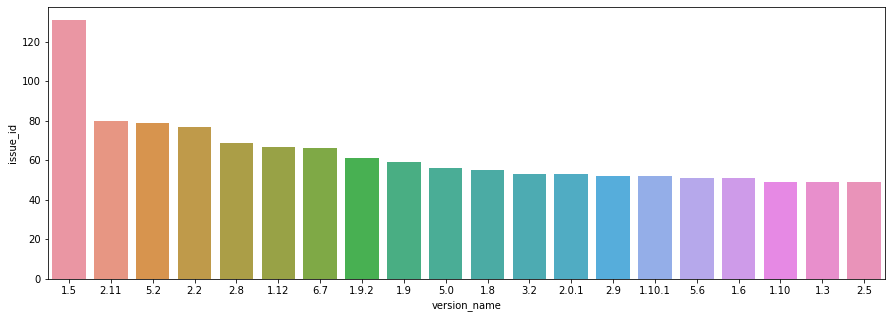

In [253]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(20))

In [267]:
version_merged = pd.merge(issues_df, issues_versions, on="issue_id")

In [284]:
top_versions.head(10).version_name.values

array(['1.5', '2.11', '5.2', '2.2', '2.8', '1.12', '6.7', '1.9.2', '1.9',
       '5.0'], dtype=object)

In [291]:
versions_sorted = issues_versions.sort_values(by="version_name").version_name.unique()

array(['6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2', '6.4', '6.5',
       '6.5-M1', '6.6', '6.6-M1', '6.7', '6.7.1', '6.7.2', '6.7.3',
       '6.7.4', '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2', '7.2.1',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1', '7.9.2',
       '7.9.3', '7.9.4', '8.0', '8.1', '8.2', '8.3', '8.3.1', '8.4',
       '8.4.1', '8.4.2', 'DEV-MAVEN-PLUGIN-0.8 '], dtype=object)

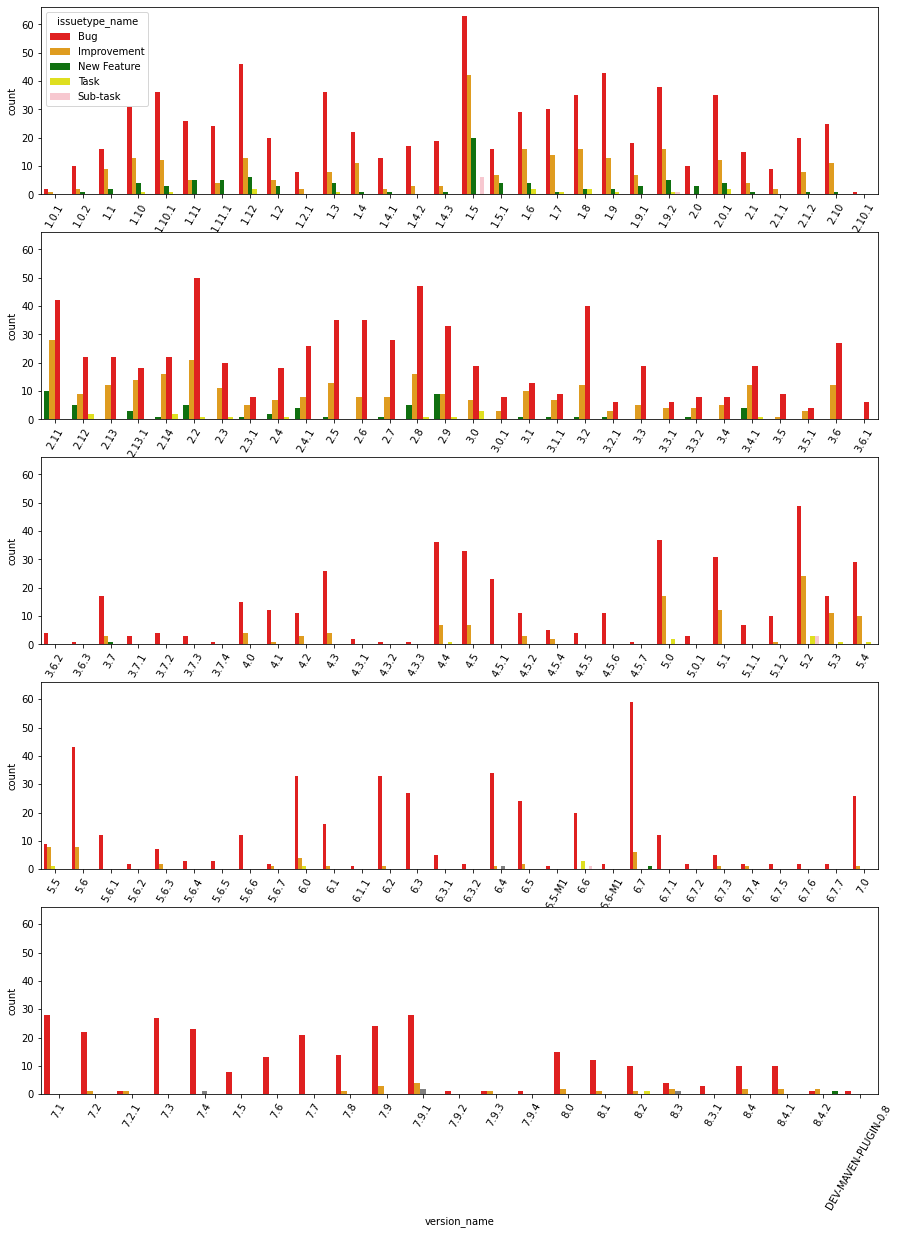

In [311]:
f, axes = plt.subplots(5,1, figsize=(15,20), sharey=True)
for i in range(5):
    data = version_merged[version_merged.version_name.isin(versions_sorted[30*i:30*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [323]:
no_version_issues = issues_df[~issues_df.issue_id.isin(version_merged.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,...,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,None,SONAR,Not captured yet,None,...,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,None,SONAR,Not captured yet,None,...,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1,Fixed,0
46,SONAR-13854,97337,Bug,P3-Medium,0|i0dh3z:,No root cause identified,None,SONAR,Not captured yet,None,...,None,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,1,Open,None,None,0
52,SONAR-13847,97230,Bug,P3-Medium,0|i0dgg7:,No root cause identified,None,SONAR,Not captured yet,None,...,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,jeremy.davis,6,Closed,1,Fixed,0
67,SONAR-13827,97063,Bug,P3-Medium,0|i0dff3:,No root cause identified,None,SONAR,Not captured yet,None,...,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,duarte.meneses,6,Closed,1,Fixed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493,SONAR-14,29437,Bug,None,0|i02zx3:,None,None,SONAR,None,None,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,1,Fixed,0
11495,SONAR-12,29429,Bug,None,0|i02zvj:,None,None,SONAR,None,None,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,1,Fixed,0
11496,SONAR-11,29439,Bug,None,0|i02zxj:,None,None,SONAR,None,None,...,cedric.munger,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,1,Fixed,0
11497,SONAR-10,30974,Bug,None,0|i0385r:,None,None,SONAR,None,None,...,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,simon.brandhof,6,Closed,1,Fixed,0


In [339]:
bug_no_version[bug_no_version.status_name == "Resolved"][["summary", "description", "status_name", "resolution_name", "resolutiondate","issue_id", "issue_key"]]

,summary,description,status_name,resolution_name,resolutiondate,issue_id,issue_key
148,Maintainability Rating and Technical debt rati...,When updating an issue of type code smells on ...,Resolved,Fixed,2020-07-31 09:30:23+00:00,96361,SONAR-13694
250,Background task reload doesn't update as expected,In the background tasks page:\r\n\r\nPress the...,Resolved,Fixed,2020-08-14 13:47:18+00:00,94999,SONAR-13507


In [340]:
bug_no_version[bug_no_version.resolution_name == "Fixed"]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,customfield_11630,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,None,SONAR,Not captured yet,None,[8.5],Not assessed yet,Not captured yet,None,Fixed,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,2020-09-15 12:37:57+00:00,-1,None,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,None,None,Major,Enterprise,None,None,None,[],None,None,None,None,None,None,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,"[Portfolio & Application, Web API]",None,None,None,None,None,When using {{api/views/add_sub_view}} with a d...,None,SonarQube,None,None,None,None,None,None,None,{},None,None,It should not be possible to use a description...,Julien Lancelot,[],None,None,Julien Lancelot,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],NaT,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,None,SONAR,Not captured yet,None,[8.5],Not assessed yet,Not captured yet,None,Fixed,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,2020-09-18 09:41:58+00:00,-1,None,<JIRA Watchers at 5064045088>,2020-09-08 07:52:57+00:00,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[],Jeremy Davis,2020-09-18 09:41:58+00:00,Closed,"[Security Hotspots, Web]",None,None,None,None,None,Facet `Security Review` is not working while c...,None,SonarQube,None,None,None,None,None,None,None,{},None,None,Projects page - Security Review facet on new c...,Jacek Poreda,[],None,None,Jacek Poreda,None,None,None,None,None,None,None,New,None,None,None,None,,None,[],2020-09-21 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1,Fixed,0
52,SONAR-13847,97230,Bug,P3-Medium,0|i0dgg7:,No root cause identified,None,SONAR,Not captured yet,None,[8.5],Not assessed yet,Not captured yet,None,Fixed,None,No action plan,None,Not captured yet,None,None,Not captured yet,None,None,None,None,None,2020-09-04 13:22:54+00:00,-1,None,<JIRA Watchers at 5061637168>,2020-09-02 15:59:37+00:00,None,None,Major,Community,None,None,None,[],None,None,None,None,None,None,[],[],Jeremy Davis,2020-09-04 13:22:54+00:00,Closed,[Web],None,None,None,None,None,"When a

In [337]:
for i in issues_df.columns:
    newDf = issues_df.loc[lambda issues_df: issues_df[i] == 'Community']
    if(not newDf.empty):
        print(i)

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


AttributeError: 'str' object has no attribute 'name'

### Status

In [221]:
issues_df.status.unique()

array(['Open', 'In Review', 'In Progress', 'Closed', 'To Do', 'Resolved',
       'Reopened'], dtype=object)

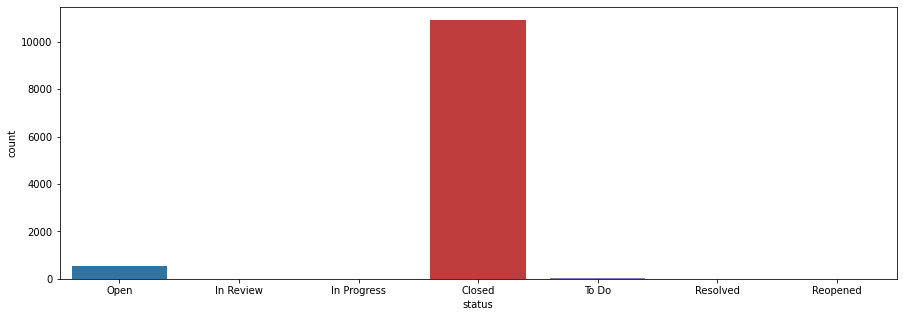

In [351]:
ax = sns.countplot(x="status", data=issues_df[["issue_id", "status"]])

### Edition

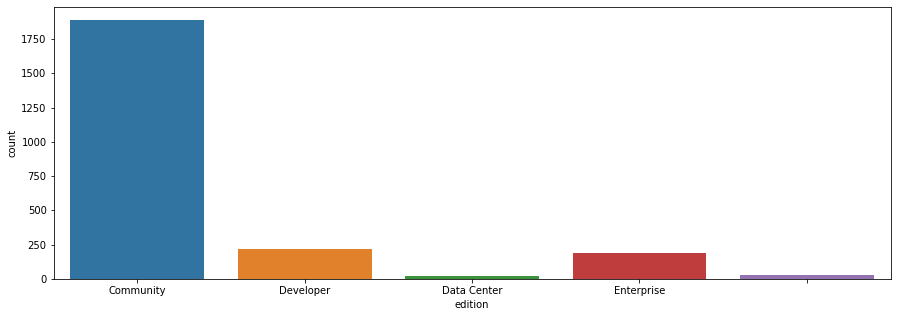

In [352]:
ax = sns.countplot(x="edition", data=issues_df)

In [354]:
issues_df.edition.describe()

count          2341
unique            5
top       Community
freq           1889
Name: edition, dtype: object

In [357]:
issues_df.edition.isna().sum()

9166

In [365]:
issues_df[(issues_df.edition.isna()) & (issues_df.resolution=="Fixed") & (issues_df.issuetype_name=="Bug")]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
1537,SONAR-11537,79313,Bug,NaN,0|i0ak6v:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.6', id='14753'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 17:05:12+00:00,-1,NaN,<JIRA Watchers at 4948864592>,2018-11-27 14:36:47+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='41651'>],Janos Gyerik,2018-12-17 16:42:19+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,"Sometimes, Check Run is not created at the end...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Fix intermittent failures to create Check Run ...,Janos Gyerik,[],NaN,NaN,Janos Gyerik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-12-10 00:00:00+00:00,0,1,Bug,3,Major,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,6,Closed,1.0,Fixed,0
1682,SONAR-11300,76901,Bug,NaN,0|i0a5j3:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-24 09:26:19+00:00,-1,NaN,<JIRA Watchers at 4869443984>,2018-09-21 12:10:27+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Fabrice Bellingard,2018-11-19 20:05:22+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,When the duration of a SonarCloud coupon excee...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Coupons with periods larger than 1 year have a...,Jean-Baptiste Lievremont,[],NaN,NaN,Jean-Baptiste Lievremont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-09-28 00:00:00+00:00,0,1,Bug,3,Major,fabrice.bellingard,fabrice.bellingard,jean-baptiste.lievremont,jeanbaptiste.lievremont,jean-baptiste.lievremont,jeanbaptiste.lievremont,6,Closed,1.0,Fixed,0
1693,SONAR-11280,76792,Bug,NaN,0|i0a4vb:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-11 16:07:18+00:00,-1,NaN,<JIRA Watchers at 4864664864>,2018-09-18 15:09:28+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,['seb'],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='7.3', id='14464'>]",[<JIRA IssueLink: id='40346'>],Sebastien Lesaint,2018-10-11 16:09:12+00:00,Closed,"[<JIRA Component: name='Compute Engine', id='1...",NaN,NaN,NaN,NaN,NaN,"If a Billing exception is raised on a PR, the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,PostProjectAnalysisTasks API fails when consum...,Sebastien Lesaint,[],NaN,NaN,Se